# Final Project

Name: **Jorge García Gámiz**

Student number: E-8332

Subject: Machine Learning

Academic Year: 2024-2025

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Build a model (other than a decision tree and knn) for the selected dataset. Tune the different values of the hyperparameters and evaluate the model.

## Data preparation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hotel_Reservations.csv to Hotel_Reservations.csv


In [73]:
data = pd.read_csv('/content/Hotel_Reservations.csv')
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


We should remove the first column of the dataset

In [74]:
data.drop(axis=1, columns='Booking_ID', inplace=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Let's check for missing values

In [76]:
data.isna().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


There are no missing values

### Encoding

We need to transform these "text" variables into a numerical form. For that, we use `LabelEncoder`

In [77]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_columns = data.select_dtypes(include=['object']).columns

for col in label_columns:
    le = preprocessing.LabelEncoder()
    data[col] = le.fit_transform(data[col])
    l = list(le.classes_)

data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


### Target variable

It is important to keep in mind now that, after we used `Label Encoder`, the target variable's values mean:
- `1` is "Not Canceled"
- `0` is "Canceled"

In [78]:
data['booking_status'].value_counts(normalize=True)

,proportion
booking_status,
1,0.672364
0,0.327636


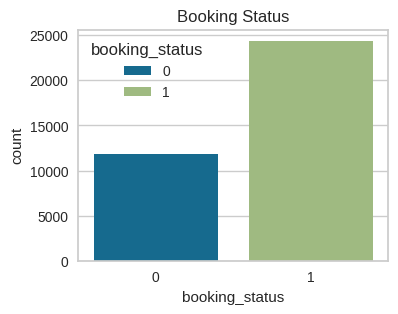

In [79]:
plt.figure(figsize=(4,3))
sns.countplot(x='booking_status', data=data, hue='booking_status')
plt.title('Booking Status')
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
X = data.drop('booking_status', axis=1)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=1)

In [81]:
y_train.value_counts(normalize=True)

,proportion
booking_status,
1,0.672377
0,0.327623


## Model

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [84]:
# Train the classifier
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [85]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

### Evaluation the model

By definition, a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus, in binary classification, the count of true negatives (TN) is $C_{0,0}$, false negatives (FN) is $C_{1,0}$, true positives (TP) is $C_{1,1}$ and false positives (FP) is $C_{0,1}$.

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2941,  625],
       [ 578, 6739]])

 * **Precision**: The proportion of true positive predictions out of all predictions made for a given class. It answers: "When the model predicts a class, how often is it correct?"
$$
\text{Precision}=\frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Positives (FP)}}
$$


 * **Recall** (Sensitivity or True Positive Rate): The proportion of actual positives correctly identified. It answers: "Out of all actual instances of a class, how many were predicted correctly?"
$$
\text{Recall}=\frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Negatives (FN)}}
$$

 * **F1-Score**: The harmonic mean of precision and recall. It balances the trade-off between precision and recall.
$$
\text{F1-Score}=2\cdot \frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}
$$

 * **Support**: The number of true instances of each class in the test data.

In [87]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8894606266654416

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3566
           1       0.92      0.92      0.92      7317

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.87     10883
weighted avg       0.89      0.89      0.89     10883



* **Class "Canceled"** (`0`):
 - **Precision** (0.84): When the model predicts `0`, it is correct 84% of the time.
 - **Recall** (0.82): Of all actual `0` instances, the model correctly identifies 82%.
 - **F1-Score** (0.83): A balance between precision and recall for `0`.
 - **Support** (3566): There are 3566 actual instances of `0` in the test data.

* **Class "Not Canceled"** (`1`):
 - **Precision** (0.92): When the model predicts `1`, it is correct 92% of the time.
 - **Recall** (0.92): Of all actual `1` instances, the model correctly identifies 92%.
 - **F1-Score** (0.92): A balance between precision and recall for `1`.
 - **Support** (7317): There are 7317 actual instances of `1` in the test data.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


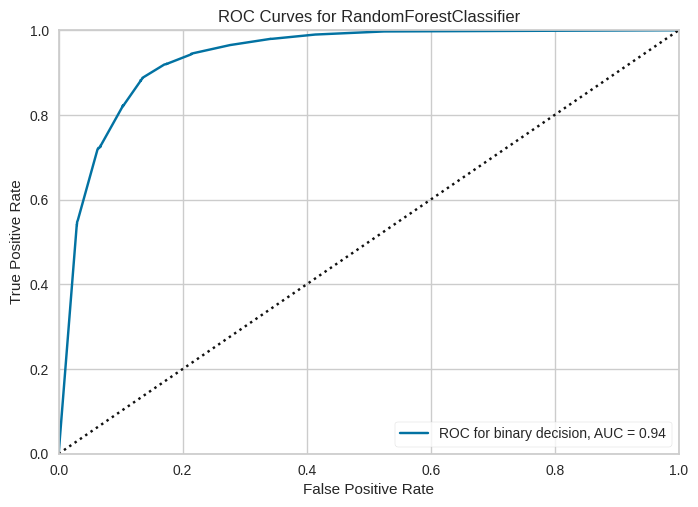

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(rf_model, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

 An AUC of $0.94$ means that $94\%$ of the time, the model assigns a higher score to a positive instance than to a negative one.

In [89]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

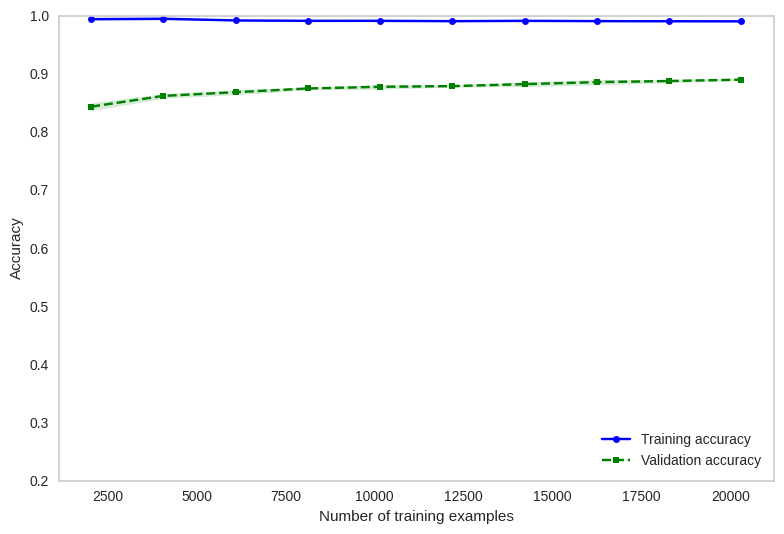

In [90]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 1.0])
plt.tight_layout()
plt.show()

We're looking to improve this model using Random Forest, which works by building multiple decision trees and combining their results for better accuracy. To do this, we'll fine-tune the parameters that control how the trees are created and work together.

In [91]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Second Model

### Hyperparameter Tuning

Using Scikit-Learn's RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with **each** combination of values.

We tune some of the hyperparameters as below.
* `max_depth` : the maximum level of each tree. A deeper tree is more overfitted. So, a high value makes the model fail to generalize.
* `max_features` : the number of features. This is one of the main hyperparameters that prevents overfitting. The square root of the total number of features is recommended.
* `min_samples_leaf` : the minimum number of samples required to be at the leaf node of each tree.

In [92]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf': [1,3,5,10],
    'max_features': [1,2,3]
}

We will create 60 different combinations of models ($60 = 5\cdot4\cdot3$, which are the lengths of possibilities of the parameters in `params`). This is why the next cell might take some time

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid_search = GridSearchCV(rf_model,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1,
                           verbose=True,
                           scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': [1, 3, 5, 10]},
             scoring='accuracy', verbose=True)

In [96]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 1}

In [97]:
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))

0.9559310018903592
0.8903794909491868


In [98]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=3, n_estimators=10,
                       random_state=42)

Basically, with this `Grid Search` we have managed to test different values for our parameters, being able to find the best parameters that define the best possible model. However, we must remember this is extremely time-consuming

In [99]:
rf_best.fit(X_train, y_train)
best_pred = rf_best.predict(X_test)

### Evaluation of the model

Finally, let us check this best classifier

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [100]:
confusion_matrix(y_test, best_pred)

array([[2837,  729],
       [ 464, 6853]])

In [101]:
accuracy = accuracy_score(y_test, best_pred)
classification_rep = classification_report(y_test, best_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8903794909491868

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      3566
           1       0.90      0.94      0.92      7317

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.87     10883
weighted avg       0.89      0.89      0.89     10883



* **Class "Canceled"** (`0`):
 - **Precision** (0.86): When the model predicts `0`, it is correct 86% of the time.
 - **Recall** (0.80): Of all actual `0` instances, the model correctly identifies 80%.
 - **F1-Score** (0.83): A balance between precision and recall for `0`.
 - **Support** (3566): There are 3566 actual instances of `0` in the test data.

* **Class "Not Canceled"** (`1`):
 - **Precision** (0.90): When the model predicts `1`, it is correct 90% of the time.
 - **Recall** (0.94): Of all actual `1` instances, the model correctly identifies 94%.
 - **F1-Score** (0.92): A balance between precision and recall for `1`.
 - **Support** (7317): There are 7317 actual instances of `1` in the test data.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


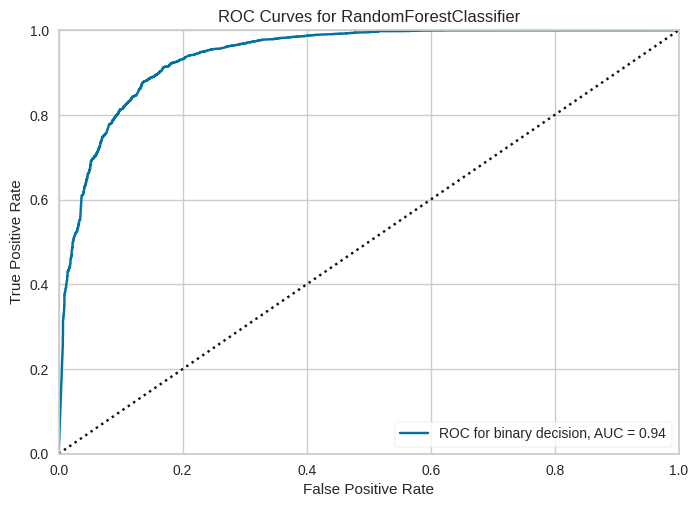

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [102]:
vis = ROCAUC(rf_best, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

 An AUC of $0.94$ means that $94\%$ of the time, the model assigns a higher score to a positive instance than to a negative one.

In [103]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_best,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

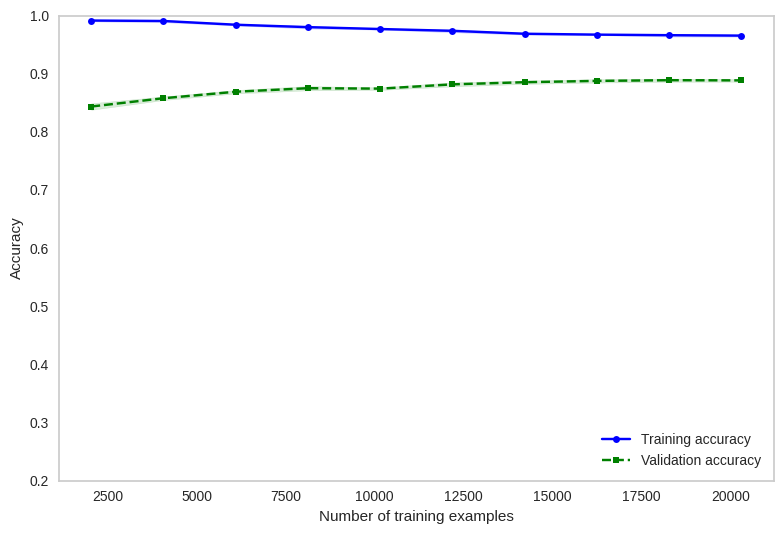

In [104]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.2, 1.0])
plt.tight_layout()
plt.show()

We can see there has been a slight imporovement here, because in the previous graph the training accuracy was constantly 1, while in this case we can observe how it tends to get closer to the validation accuracy, making this model better